## WUM - praca domowa 2, Franciszek Saliński

Importowanie potrzebnych bibliotek

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 2137

Pobieranie danych

In [36]:
from sklearn.datasets import fetch_openml
df = fetch_openml(data_id = 31)
y = df.target
X = df.data

### 1. Eksploracja danych

In [37]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [38]:
y.value_counts()

class
good    700
bad     300
Name: count, dtype: int64

In [39]:
X.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [40]:
X.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
dtype: int64

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [42]:
X.describe(include='all')

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,NaN,car,NaN,none,own,NaN,skilled,NaN,none,yes
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [43]:
categorical_columns = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment',
                       'personal_status', 'other_parties','property_magnitude', 'other_payment_plans',
                       'housing', 'job', 'own_telephone', 'foreign_worker']

numerical_columns = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age',
                     'existing_credits', 'num_dependents']

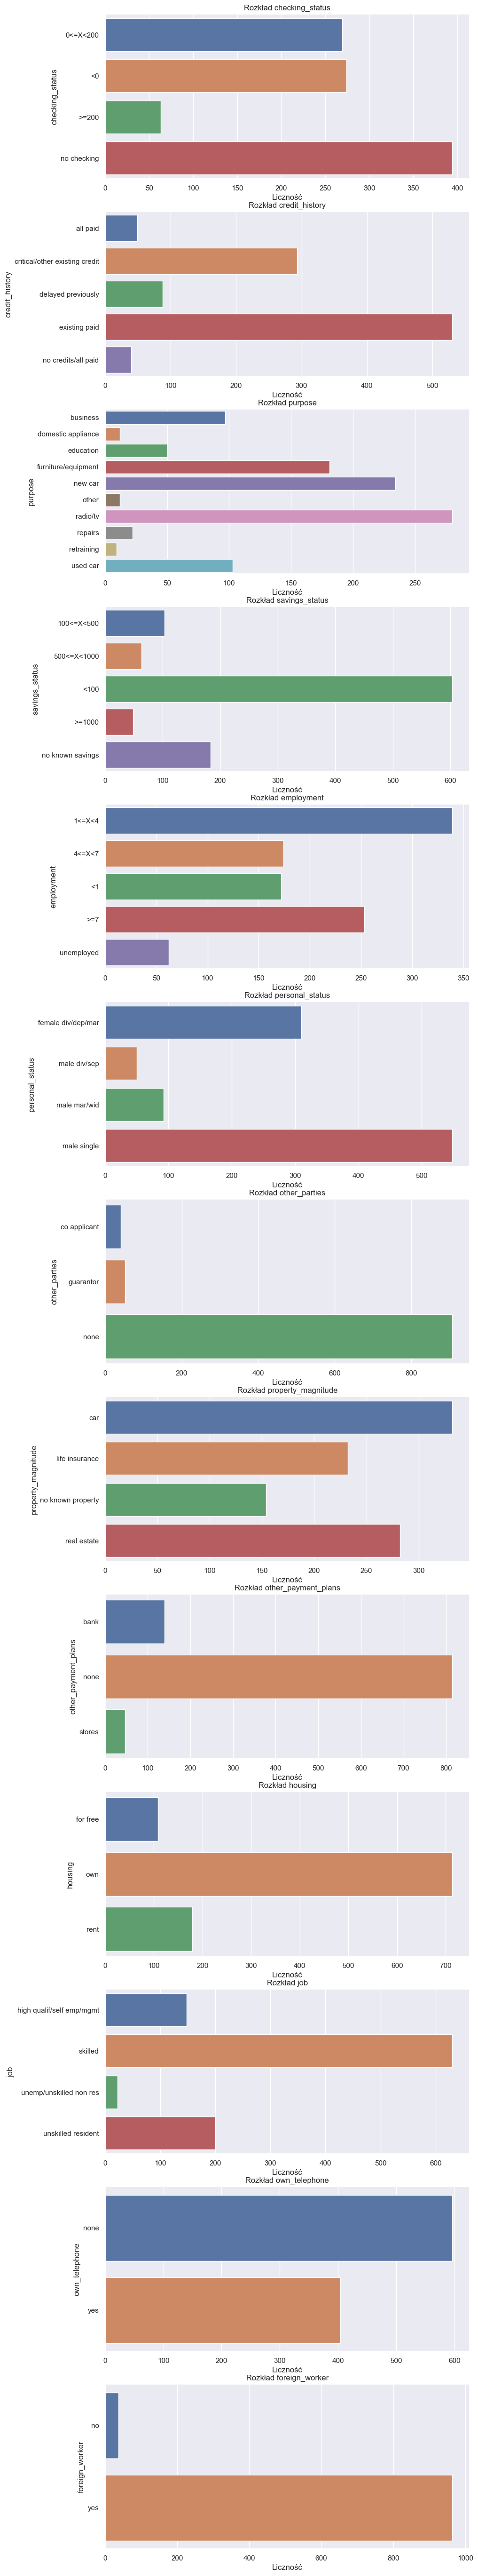

In [44]:
fig, ax = plt.subplots(13, 1, figsize=(10, 70))

for i, col in enumerate(categorical_columns):
    plt.subplot(13, 1, i+1)
    sns.countplot(data=X, y=col)
    plt.title(f"Rozkład {col}")
    plt.xlabel("Liczność")
    plt.ylabel(col)

plt.show()

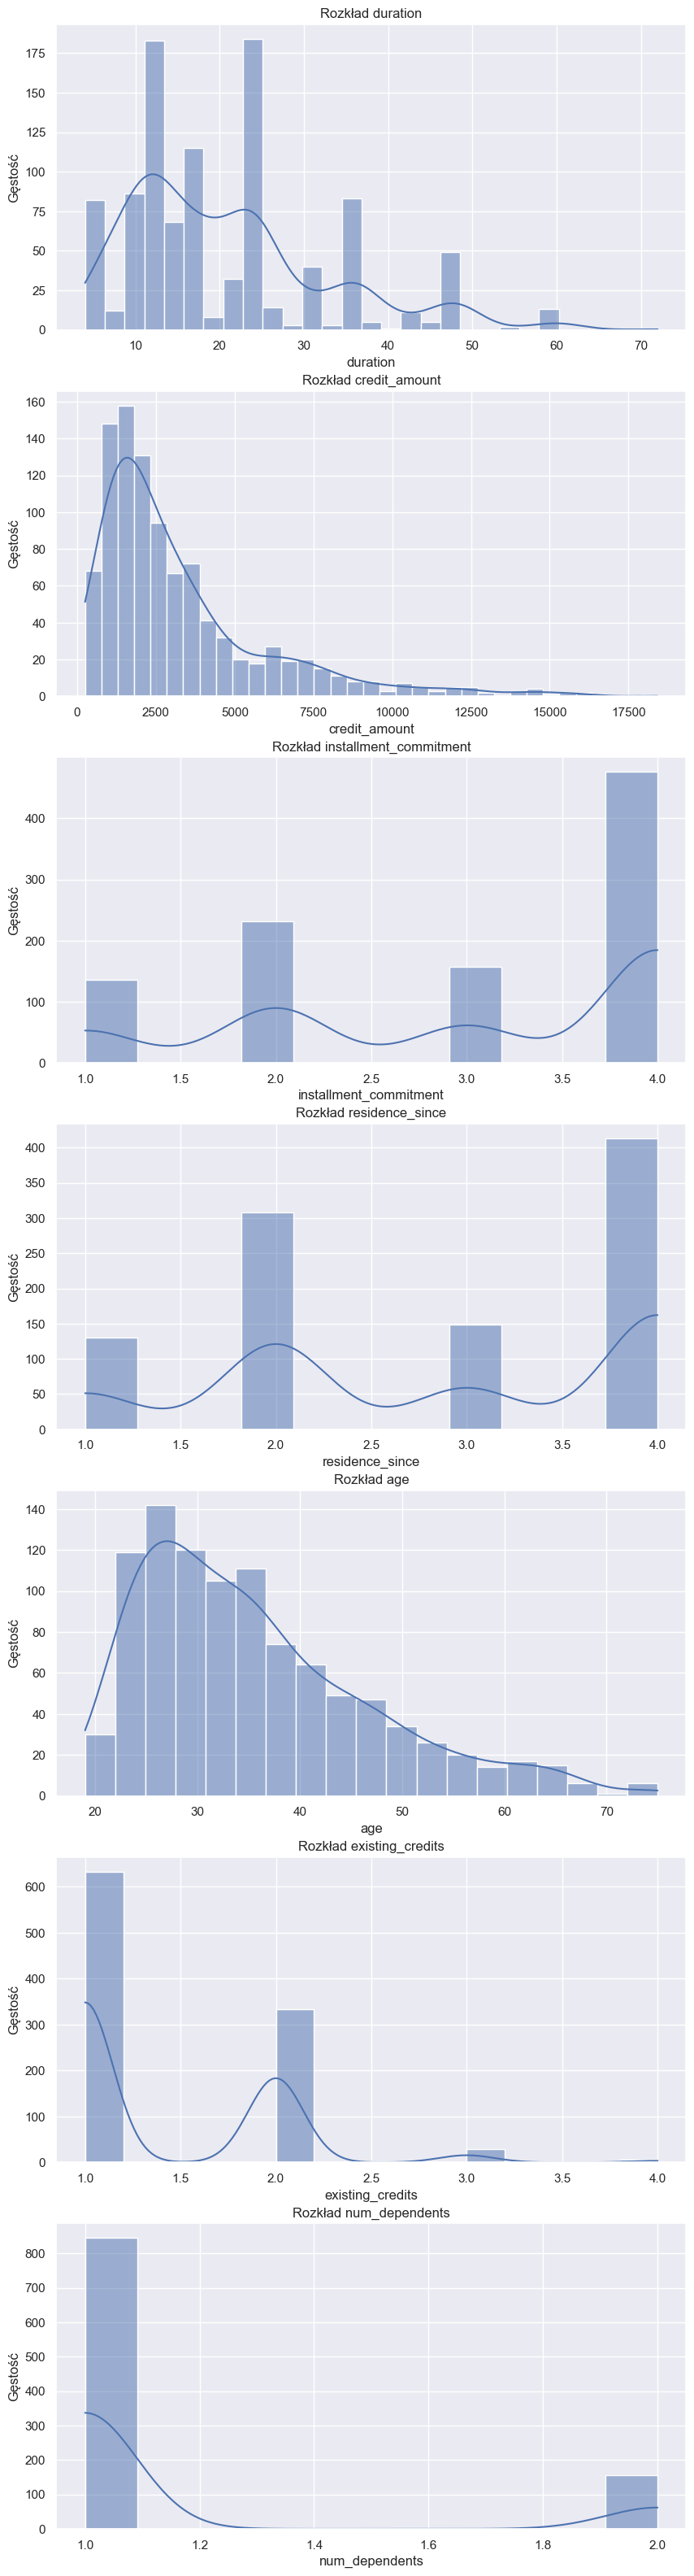

In [45]:
fig, ax = plt.subplots(7, 1, figsize=(10, 40))

for i, col in enumerate(numerical_columns):
    plt.subplot(7, 1, i+1)
    sns.histplot(data=X, x=col, kde=True)
    plt.title(f"Rozkład {col}")
    plt.xlabel(col)
    plt.ylabel("Gęstość")

plt.show()

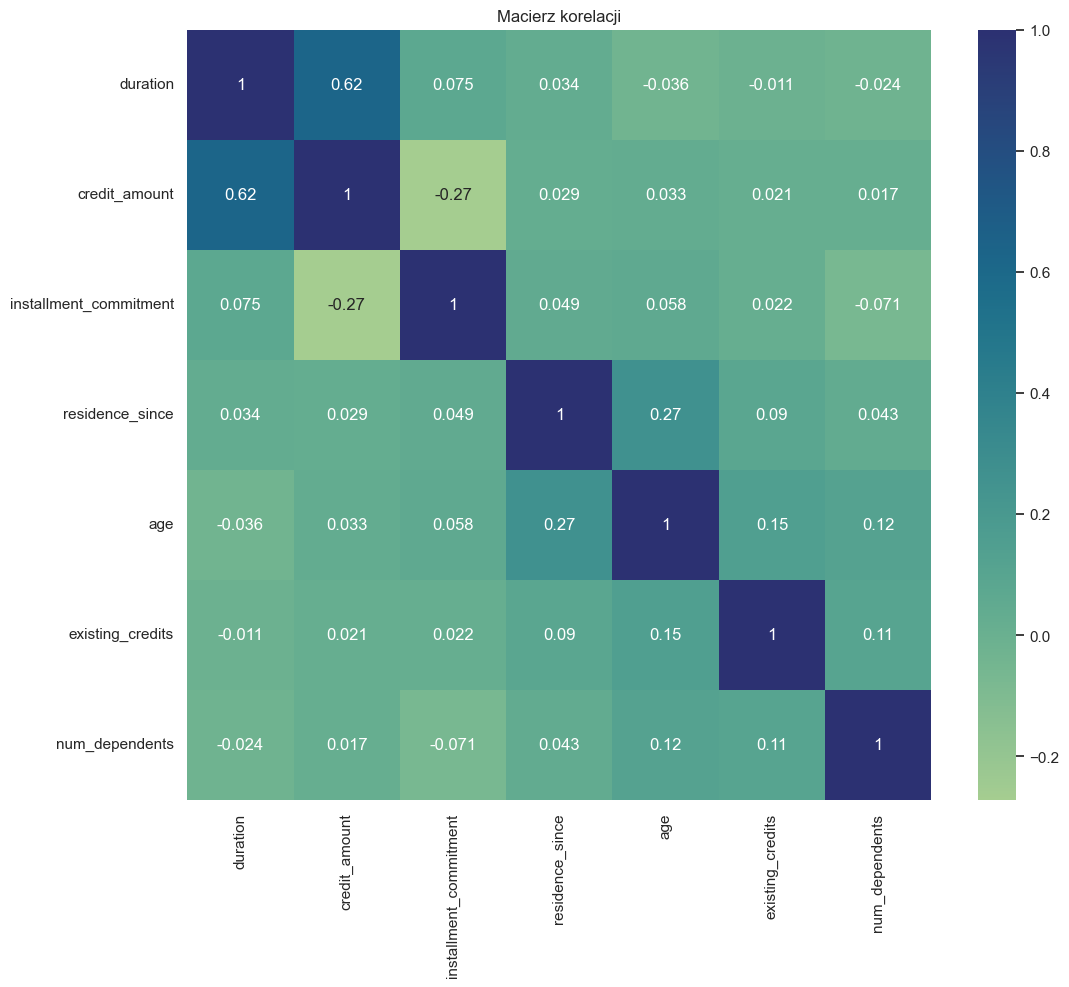

In [46]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(numeric_only=True), annot=True, cmap='crest')
plt.title("Macierz korelacji")
plt.show()

## 2. Przetwarzanie danych

In [47]:
# One-hot encoding kolumn kategorycznych
for col in categorical_columns:
    if col == 'employment':
        X[[col]] = X[[col]].replace({'unemployed': 0,
                                     '1<=X<4': 2,
                                     '<1': 1,
                                     '>=7': 4,
                                     '4<=X<7': 3})
    else:
        X = pd.concat([X, pd.get_dummies(X[col], prefix=col, drop_first=True, dtype=int)], axis=1)
        X.drop(col, axis=1, inplace=True)

numerical_columns.append('employment')
# Standaryzacja kolumn numerycznych do rozkładu o średniej 0 i odchyleniu standardowym 1
for col in numerical_columns:
    X[col] = StandardScaler().fit_transform(X[[col]])

X.head()

,duration,credit_amount,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,-1.236478,-0.745131,1.338078,0.918477,1.046987,2.766456,1.027079,-0.428290,1,0,...,1,1,0,1,0,1,0,0,1,1
1,2.248194,0.949817,-0.317959,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,0,...,1,1,0,1,0,1,0,0,0,1
2,-0.738668,-0.416562,0.510060,-0.870183,0.140505,1.183312,-0.704926,2.334869,0,0,...,1,1,0,1,0,0,0,1,0,1
3,1.750384,1.634247,0.510060,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0.256953,0.566664,-0.317959,0.024147,1.046987,1.535122,1.027079,2.334869,1,0,...,0,1,0,0,0,1,0,0,0,1


In [48]:
y = y.map({'good': 0, 'bad': 1})
y.value_counts()

class
0    700
1    300
Name: count, dtype: int64

In [49]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

## 3. Część 1

In [50]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [51]:
log_reg = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced')

In [52]:
SCORING = 'roc_auc'

### 1. Model regresji logistycznej bez regularyzacji
Nie ma hiperparametrów do optymalizacji, niżej wytrenowany model

### 2. Model z regularyzacją L1

In [53]:
param_grid = {
    'C' : [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 10, 20],
    'solver' : ['liblinear'],
    'penalty' : ['l1']   
}

grid_search_l1 = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=cv, scoring=SCORING, verbose=1)
grid_search_l1.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2137, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=2137),
             param_grid={'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 10, 20],
                         'penalty': ['l1'], 'solver': ['liblinear']},
             scoring='roc_auc', verbose=1)

In [54]:
grid_search_l1.best_params_

{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}

In [55]:
grid_search_l1.best_score_

0.7747767857142858

### 3. Model z regularyzacją L2

In [56]:
param_grid = {
    'C' : [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 10, 20],
    'penalty' : ['l2']
}

grid_search_l2 = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=cv, scoring=SCORING, verbose=1)
grid_search_l2.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2137, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=2137),
             param_grid={'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 10, 20],
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=1)

In [57]:
grid_search_l2.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [58]:
grid_search_l2.best_score_

0.7767113095238096

### 4. Model ElasticNet

In [59]:
param_grid = {
    'C' : [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 10, 20],
    'max_iter' : [10000],
    'l1_ratio' : [0.1, 0.25, 0.5, 0.75, 0.9],
    'solver' : ['saga'],
    'penalty' : ['elasticnet']
}

grid_search_elastic = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=cv, scoring=SCORING, verbose=1)
grid_search_elastic.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2137, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=2137),
             param_grid={'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 10, 20],
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
                         'max_iter': [10000], 'penalty': ['elasticnet'],
                         'solver': ['saga']},
             scoring='roc_auc', verbose=1)

In [60]:
grid_search_elastic.best_params_

{'C': 0.1,
 'l1_ratio': 0.1,
 'max_iter': 10000,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [61]:
grid_search_elastic.best_score_

0.7760416666666667

### Modele z najlepszymi hiperparametrami

In [62]:
log_reg = LogisticRegression(penalty=None, random_state=RANDOM_STATE, class_weight='balanced')
log_reg.fit(X_train, y_train)

log_reg_l1 = LogisticRegression(C=grid_search_l1.best_params_['C'], penalty='l1', solver='liblinear', random_state=RANDOM_STATE, class_weight='balanced')
log_reg_l1.fit(X_train, y_train)

log_reg_l2 = LogisticRegression(C=grid_search_l2.best_params_['C'], penalty='l2', random_state=RANDOM_STATE, class_weight='balanced')
log_reg_l2.fit(X_train, y_train)

log_reg_elasticnet = LogisticRegression(C=grid_search_elastic.best_params_['C'], penalty='elasticnet',
                                        l1_ratio=grid_search_elastic.best_params_['l1_ratio'], solver='saga', max_iter=10000, random_state=RANDOM_STATE, class_weight='balanced')
log_reg_elasticnet.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', l1_ratio=0.1, max_iter=10000,
                   penalty='elasticnet', random_state=2137, solver='saga')

In [63]:
# Metrics table
metrics = pd.DataFrame(columns=['Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
model_labels = ['Logistic Regression', 'Logistic Regression L1', 'Logistic Regression L2', 'Logistic Regression ElasticNet']
for i, model in enumerate([log_reg, log_reg_l1, log_reg_l2, log_reg_elasticnet]):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    metrics = pd.concat([metrics, pd.DataFrame(data=[[model_labels[i], 'Test', accuracy_score(y_test, y_pred),
                                                         precision_score(y_test, y_pred),
                                                         recall_score(y_test, y_pred),
                                                         f1_score(y_test, y_pred),
                                                         roc_auc_score(y_test, y_pred_proba)]],
                                                    columns=['Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])])
    y_pred_train = model.predict(X_train)
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    metrics = pd.concat([metrics, pd.DataFrame(data=[[model_labels[i], 'Train', accuracy_score(y_train, y_pred_train),
                                                         precision_score(y_train, y_pred_train),
                                                         recall_score(y_train, y_pred_train),
                                                         f1_score(y_train, y_pred_train),
                                                         roc_auc_score(y_train, y_pred_proba_train)]],
                                                    columns=['Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])])

# Round results to 3 decimal places
metrics = metrics.round(3)

metrics.set_index('Model', inplace=True)
metrics

,Data,Accuracy,Precision,Recall,F1,AUC
Model,,,,,,
Logistic Regression,Test,0.735,0.545,0.700,0.613,0.785
Logistic Regression,Train,0.760,0.574,0.775,0.660,0.835
Logistic Regression L1,Test,0.730,0.537,0.733,0.620,0.800
Logistic Regression L1,Train,0.741,0.550,0.758,0.637,0.826
Logistic Regression L2,Test,0.750,0.562,0.750,0.643,0.802
Logistic Regression L2,Train,0.746,0.557,0.758,0.642,0.824
Logistic Regression ElasticNet,Test,0.750,0.561,0.767,0.648,0.801
Logistic Regression ElasticNet,Train,0.738,0.545,0.754,0.633,0.822


Text(0.5, 1.0, 'Krzywa ROC, Dane Treningowe')

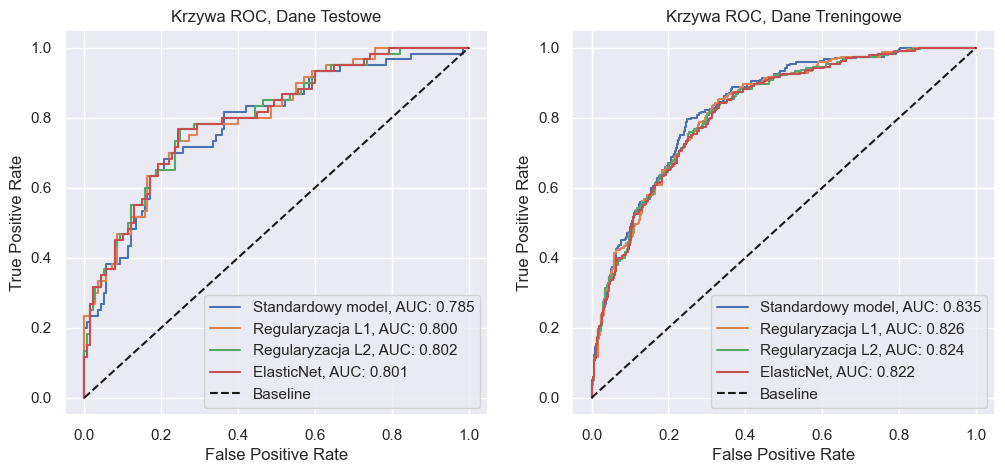

In [64]:
# Krzywe ROC
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
labels = ['Standardowy model', 'Regularyzacja L1', 'Regularyzacja L2', 'ElasticNet']

for i, model in enumerate([log_reg, log_reg_l1, log_reg_l2, log_reg_elasticnet]):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    ax[0].plot(fpr, tpr, label=labels[i] + f", AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")

    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_pred_proba_train)
    ax[1].plot(fpr, tpr, label=labels[i] + f", AUC: {roc_auc_score(y_train, y_pred_proba_train):.3f}")

for i in range(2):
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    ax[i].plot([0, 1], [0, 1], 'k--', label="Baseline")
    ax[i].legend()

ax[0].set_title('Krzywa ROC, Dane Testowe')
ax[1].set_title('Krzywa ROC, Dane Treningowe')

In [65]:
# Tabela współczynników
coefficients = pd.DataFrame(columns=['Feature'] + model_labels)
for i, model in enumerate(X_train.columns):
    coefficients = pd.concat([coefficients, pd.DataFrame(data=[[model, log_reg.coef_[0][i], log_reg_l1.coef_[0][i],
                                                                 log_reg_l2.coef_[0][i], log_reg_elasticnet.coef_[0][i]]],
                                                         columns=['Feature'] + model_labels)])

coefficients.set_index('Feature', inplace=True)
coefficients

,Logistic Regression,Logistic Regression L1,Logistic Regression L2,Logistic Regression ElasticNet
Feature,,,,
duration,0.339646,0.316346,0.316186,0.314553
credit_amount,0.388407,0.339323,0.274744,0.270907
employment,-0.180554,-0.148373,-0.158447,-0.151823
installment_commitment,0.418994,0.362342,0.327170,0.319632
residence_since,0.026120,0.013377,0.023990,0.019571
age,-0.168024,-0.146634,-0.163925,-0.153581
existing_credits,0.210517,0.132931,0.101228,0.095771
num_dependents,0.126095,0.093374,0.095065,0.087057
checking_status_<0,0.141137,0.212939,0.307865,0.298108


## 4. Część 2

### Wybór zmiennych

In [66]:
columns_to_drop = np.array(coefficients[coefficients['Logistic Regression L1'] == 0].index)

In [67]:
X_train.shape

(800, 45)

In [68]:
X_train.drop(columns_to_drop, axis=1, inplace=True)
X_test.drop(columns_to_drop, axis=1, inplace=True)
X_train.shape

(800, 31)

### Model SVM

In [69]:
svc = SVC(random_state=RANDOM_STATE, probability=True, class_weight='balanced')

param_grid = {
    'C' : [0.01, 0.02, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 5, 10, 20],
    'kernel' : ['linear']
}

grid_search_svc_linear = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv, scoring=SCORING, verbose=1)
grid_search_svc_linear.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2137, shuffle=True),
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=2137),
             param_grid={'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 1,
                               1.25, 1.5, 2, 5, 10, 20],
                         'kernel': ['linear']},
             scoring='roc_auc', verbose=1)

In [70]:
grid_search_svc_linear.best_params_

{'C': 0.2, 'kernel': 'linear'}

In [71]:
grid_search_svc_linear.best_score_

0.7856770833333334

### Budowa najlepszego modelu

In [72]:
svm_linear = SVC(C=grid_search_svc_linear.best_params_['C'], kernel=grid_search_svc_linear.best_params_['kernel'],
                    probability=True, random_state=RANDOM_STATE, class_weight='balanced')
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)
y_pred_proba = svm_linear.predict_proba(X_test)[:, 1]
y_pred_train = svm_linear.predict(X_train)
y_pred_proba_train = svm_linear.predict_proba(X_train)[:, 1]

metrics_svm_linear = pd.DataFrame(columns=['Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

metrics_svm_linear = pd.concat([metrics_svm_linear, pd.DataFrame(data=[['SVM Linear', 'Test', accuracy_score(y_test, y_pred),
                                                    precision_score(y_test, y_pred),
                                                    recall_score(y_test, y_pred),
                                                    f1_score(y_test, y_pred),
                                                    roc_auc_score(y_test, y_pred_proba)]],
                                            columns=['Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])])

metrics_svm_linear = pd.concat([metrics_svm_linear, pd.DataFrame(data=[['SVM Linear', 'Train', accuracy_score(y_train, y_pred_train),
                                                    precision_score(y_train, y_pred_train),
                                                    recall_score(y_train, y_pred_train),
                                                    f1_score(y_train, y_pred_train),
                                                    roc_auc_score(y_train, y_pred_proba_train)]],
                                            columns=['Model', 'Data', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])])

metrics_svm_linear = metrics_svm_linear.round(3)
metrics_svm_linear.set_index('Model', inplace=True)
metrics_svm_linear

,Data,Accuracy,Precision,Recall,F1,AUC
Model,,,,,,
SVM Linear,Test,0.735,0.542,0.750,0.629,0.805
SVM Linear,Train,0.732,0.538,0.767,0.632,0.826


Text(0.5, 1.0, 'Krzywa ROC, Dane Treningowe')

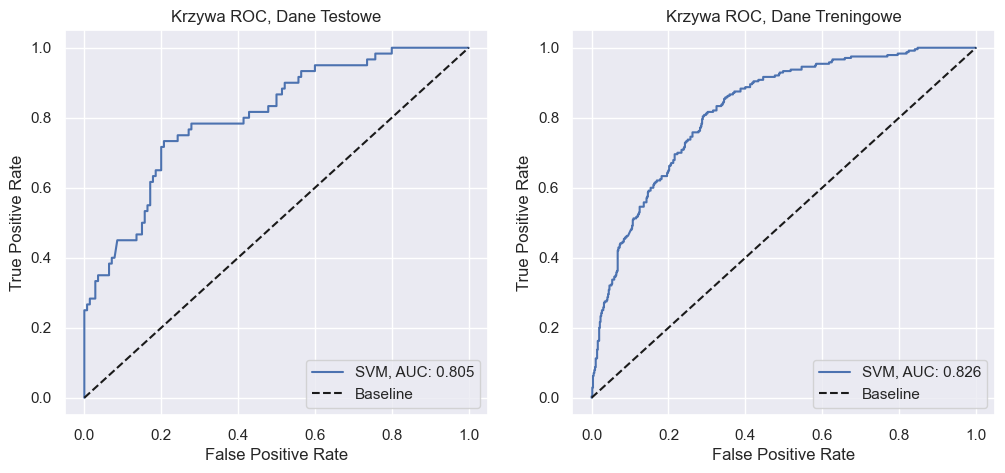

In [73]:
# Krzywe ROC dla modelu SVM
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax[0].plot(fpr, tpr, label=f"SVM, AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].plot([0, 1], [0, 1], 'k--', label="Baseline")
ax[0].legend(loc = 'lower right')
ax[0].set_title('Krzywa ROC, Dane Testowe')

fpr, tpr, _ = roc_curve(y_train, y_pred_proba_train)
ax[1].plot(fpr, tpr, label=f"SVM, AUC: {roc_auc_score(y_train, y_pred_proba_train):.3f}")
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].plot([0, 1], [0, 1], 'k--', label="Baseline")
ax[1].legend(loc = 'lower right')
ax[1].set_title('Krzywa ROC, Dane Treningowe')